<a href="https://www.kaggle.com/code/realkalkizero/scaling-and-normalization-practice-1?scriptVersionId=254235091" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [70]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train_and_test2.csv


## Perfoming the following methodologies which will cover standardization and normalization and will document the effects on machine learning model
1. Min-Max Scaling
2. Z-Score Standardization
3. Robust Scaling
4. Max Absolute Scaling
5. Power Transformer

In [71]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer
import seaborn as sns

In [72]:
db = pd.read_csv("/kaggle/input/titanic/train_and_test2.csv", usecols=['Passengerid', 'Age', 'Fare', 'Sex','Pclass','Embarked','2urvived'])
db.head()

,Passengerid,Age,Fare,Sex,Pclass,Embarked,2urvived
0,1,22.0,7.2500,0,3,2.0,0
1,2,38.0,71.2833,1,1,0.0,1
2,3,26.0,7.9250,1,3,2.0,1
3,4,35.0,53.1000,1,1,2.0,1
4,5,35.0,8.0500,0,3,2.0,0


In [73]:
db[db["Embarked"].isna()]

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Passengerid,Age,Fare,Sex,Pclass,Embarked,2urvived
61,62,38.0,80.0,1,1,NaN,1
829,830,62.0,80.0,1,1,NaN,1


In [74]:
db = db.drop([61,829])

In [75]:
db.dropna()

,Passengerid,Age,Fare,Sex,Pclass,Embarked,2urvived
0,1,22.0,7.2500,0,3,2.0,0
1,2,38.0,71.2833,1,1,0.0,1
2,3,26.0,7.9250,1,3,2.0,1
3,4,35.0,53.1000,1,1,2.0,1
4,5,35.0,8.0500,0,3,2.0,0
...,...,...,...,...,...,...,...
1304,1305,28.0,8.0500,0,3,2.0,0
1305,1306,39.0,108.9000,1,1,0.0,0
1306,1307,38.5,7.2500,0,3,2.0,0
1307,1308,28.0,8.0500,0,3,2.0,0


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


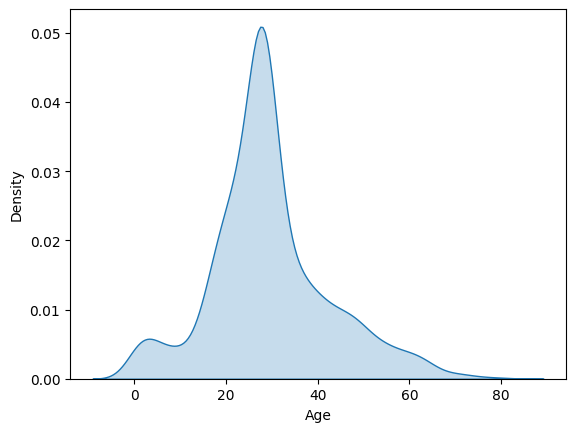

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


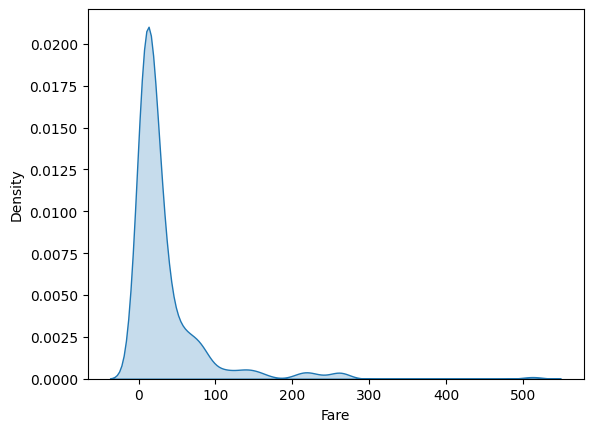

In [76]:
sns.kdeplot(db["Age"], fill= True)
plt.show()
sns.kdeplot(db["Fare"], fill= True)
plt.show()

In [77]:
db.isna().sum()

Passengerid    0
Age            0
Fare           0
Sex            0
Pclass         0
Embarked       0
2urvived       0
dtype: int64

In [78]:
db.dropna()

,Passengerid,Age,Fare,Sex,Pclass,Embarked,2urvived
0,1,22.0,7.2500,0,3,2.0,0
1,2,38.0,71.2833,1,1,0.0,1
2,3,26.0,7.9250,1,3,2.0,1
3,4,35.0,53.1000,1,1,2.0,1
4,5,35.0,8.0500,0,3,2.0,0
...,...,...,...,...,...,...,...
1304,1305,28.0,8.0500,0,3,2.0,0
1305,1306,39.0,108.9000,1,1,0.0,0
1306,1307,38.5,7.2500,0,3,2.0,0
1307,1308,28.0,8.0500,0,3,2.0,0


In [79]:
x= db.iloc[:,0:-1]
y= db.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
score = accuracy_score(y_pred,y_test)
print(f"Accuracy of KNN before applying normalization: {score}")

Accuracy of KNN before applying normalization: 0.746177370030581


# Applying Min Max Scaling

Accuracy of KNN after Min Max Scalar: 0.691131498470948


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


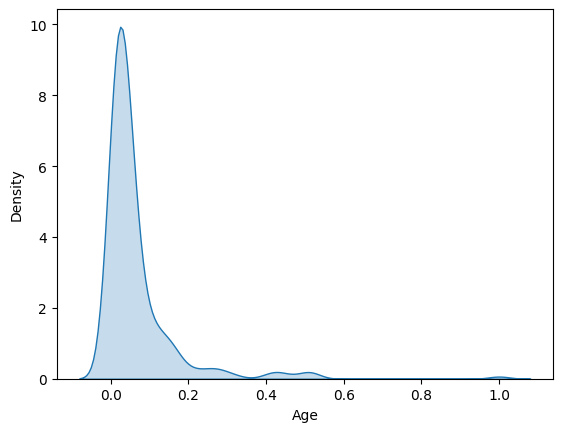

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


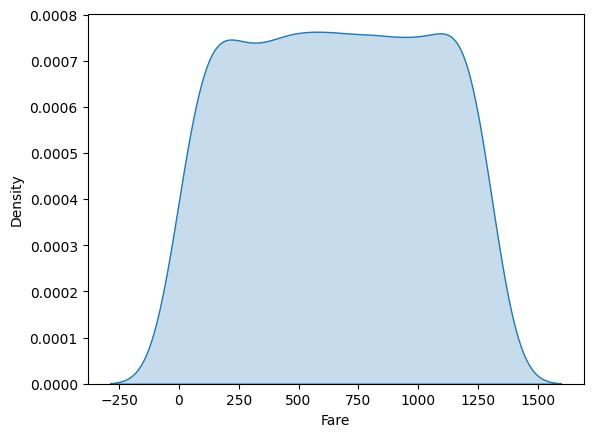

In [80]:
x= db.iloc[:,0:-1]
y= db.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42)

minmax = ColumnTransformer(
    transformers = [
        ("minmaxscaler", MinMaxScaler(),["Age","Fare"])
    ], remainder= "passthrough"
)

x_train = minmax.fit_transform(x_train)
x_test = minmax.transform(x_test)

cols = ["Passengerid","Age","Fare","Sex","Pclass","Embarked"]
x_train = pd.DataFrame(x_train,columns = cols)
x_test = pd.DataFrame(x_test,columns = cols)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
score = accuracy_score(y_pred,y_test)
print(f"Accuracy of KNN after Min Max Scalar: {score}")

sns.kdeplot(x_train["Age"], fill= True)
plt.show()
sns.kdeplot(x_train["Fare"], fill= True)
plt.show()

# Applying Z Score Standardization 

Accuracy of KNN after Standard Scalar (Z Score): 0.6941896024464832


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


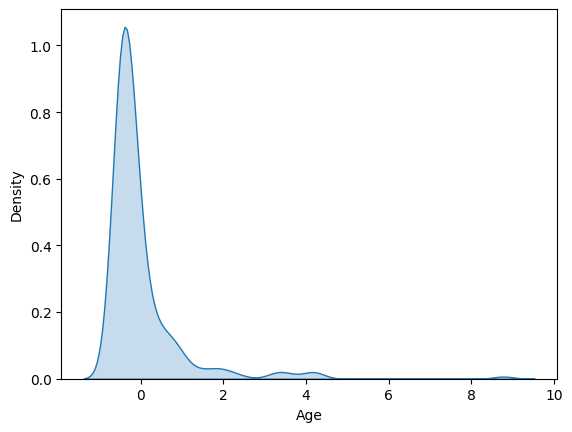

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


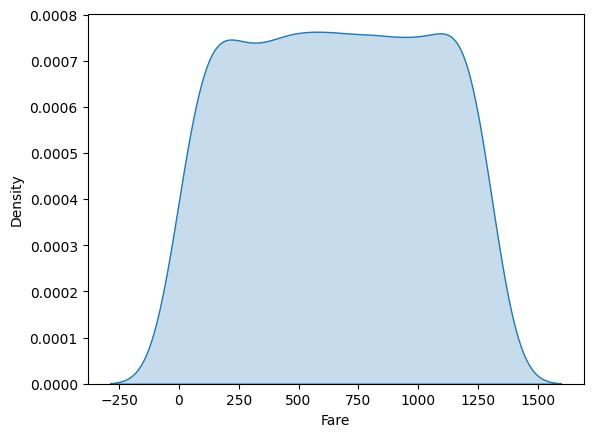

In [81]:
x= db.iloc[:,0:-1]
y= db.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42)

zscore = ColumnTransformer(
    transformers = [
        ("standardscalar", StandardScaler(),["Age","Fare"])
    ], remainder= "passthrough"
)

x_train = zscore.fit_transform(x_train)
x_test = zscore.transform(x_test)

cols = ["Passengerid","Age","Fare","Sex","Pclass","Embarked"]
x_train = pd.DataFrame(x_train,columns = cols)
x_test = pd.DataFrame(x_test,columns = cols)


knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
score = accuracy_score(y_pred,y_test)
print(f"Accuracy of KNN after Standard Scalar (Z Score): {score}")

sns.kdeplot(x_train["Age"], fill= True)
plt.show()
sns.kdeplot(x_train["Fare"], fill= True)
plt.show()

# Applying Robust Scaler

Accuracy of KNN after Robust Scalar: 0.6819571865443425


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


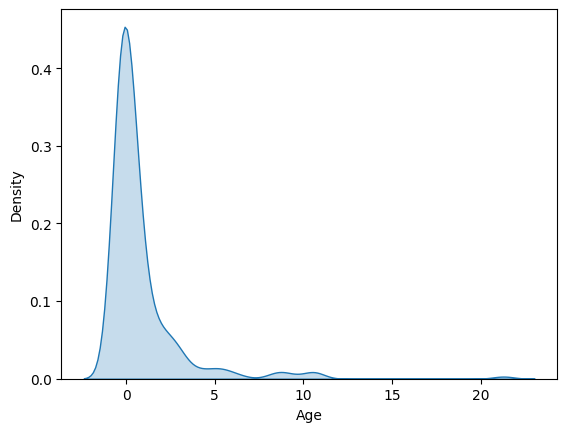

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


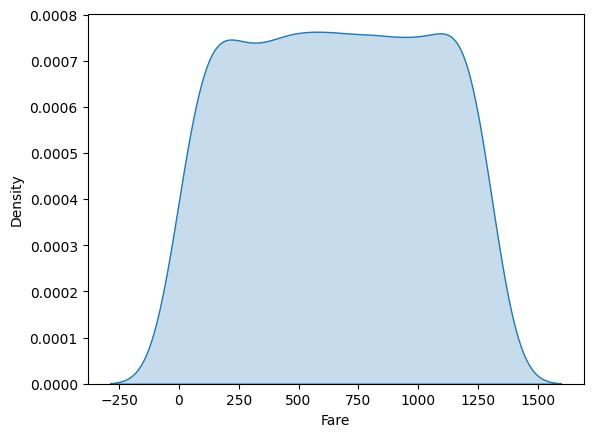

In [82]:
x= db.iloc[:,0:-1]
y= db.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42)

robust = ColumnTransformer(
    transformers = [
        ("robustscaler", RobustScaler(),["Age","Fare"])
    ], remainder= "passthrough"
)

x_train = robust.fit_transform(x_train)
x_test = robust.transform(x_test)

cols = ["Passengerid","Age","Fare","Sex","Pclass","Embarked"]
x_train = pd.DataFrame(x_train,columns = cols)
x_test = pd.DataFrame(x_test,columns = cols)


knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
score = accuracy_score(y_pred,y_test)
print(f"Accuracy of KNN after Robust Scalar: {score}")

sns.kdeplot(x_train["Age"], fill= True)
plt.show()
sns.kdeplot(x_train["Fare"], fill= True)
plt.show()

# Applying Max Absolute Scaler

Accuracy of KNN after Max Absolute Scalar: 0.691131498470948


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


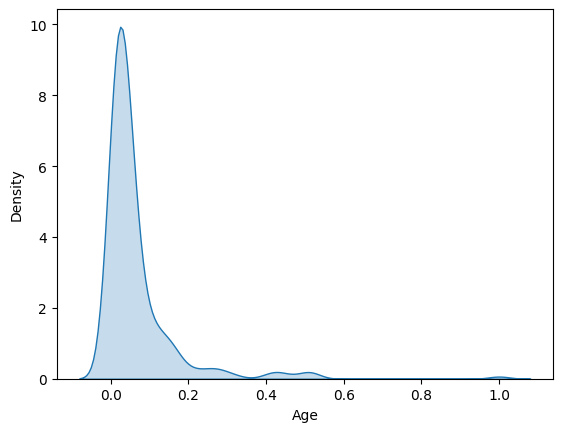

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


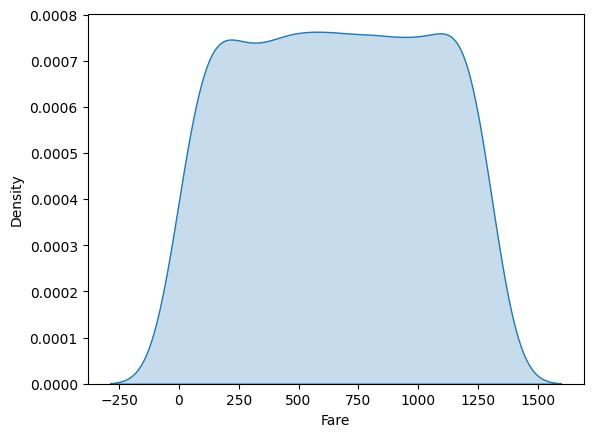

In [83]:
x= db.iloc[:,0:-1]
y= db.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42)

maxabs = ColumnTransformer(
    transformers = [
        ("maxabs", MaxAbsScaler(),["Age","Fare"])
    ], remainder= "passthrough"
)

x_train = maxabs.fit_transform(x_train)
x_test = maxabs.transform(x_test)

cols = ["Passengerid","Age","Fare","Sex","Pclass","Embarked"]
x_train = pd.DataFrame(x_train,columns = cols)
x_test = pd.DataFrame(x_test,columns = cols)


knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
score = accuracy_score(y_pred,y_test)
print(f"Accuracy of KNN after Max Absolute Scalar: {score}")

sns.kdeplot(x_train["Age"], fill= True)
plt.show()
sns.kdeplot(x_train["Fare"], fill= True)
plt.show()

# Applying Power Transformer

Accuracy of KNN after Power Transformer(Yeo-Johnson method): 0.6850152905198776


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


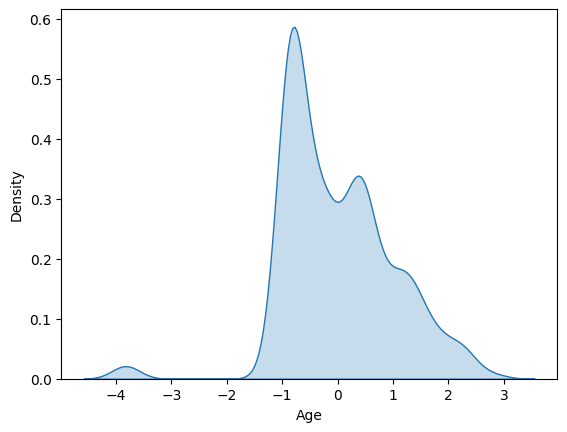

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


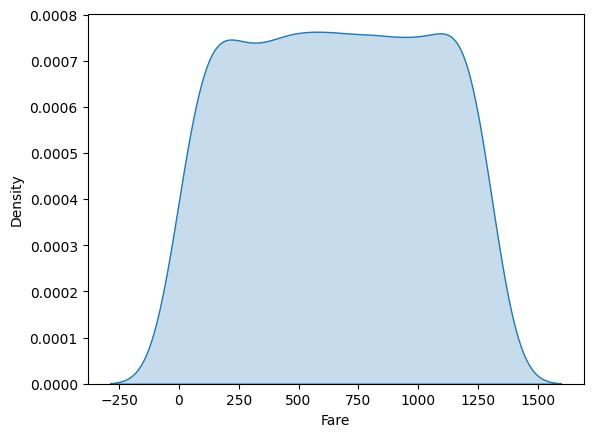

In [84]:

x= db.iloc[:,0:-1]
y= db.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42)

power = ColumnTransformer(
    transformers = [
        ("powertransformer", PowerTransformer(),["Age","Fare"])
    ], remainder= "passthrough"
)

x_train = power.fit_transform(x_train)
x_test = power.transform(x_test)

cols = ["Passengerid","Age","Fare","Sex","Pclass","Embarked"]
x_train = pd.DataFrame(x_train,columns = cols)
x_test = pd.DataFrame(x_test,columns = cols)


knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
score = accuracy_score(y_pred,y_test)
print(f"Accuracy of KNN after Power Transformer(Yeo-Johnson method): {score}")

sns.kdeplot(x_train["Age"], fill= True)
plt.show()
sns.kdeplot(x_train["Fare"], fill= True)
plt.show()